# Importing/Storing data

In [1]:
# pip install wfdb
# pip install 

In [2]:
import wfdb
import os
import glob
import pandas as pd
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
#print('Current directory is: {}'.format(os.getcwd()))

In [4]:
records = []
properties = []
annot = []
AnnSymb = []
AnnSamp = []
AnnRhythm = []
Rpeak_Samp = []
Rpeak_Symb = []


for f in glob.glob('C:/Users/masud/Desktop/Github_Bachelor_Project/wfdb-python/data/*.dat'): ##### change the path (afib) to your own directory. The rest should 
                                                                                             ##### remin the same
    sig, fields = wfdb.rdsamp(f[:-4], channels=[1])  #### In this function, you have the opportunity to pass 
                                       #### "channels=[0]" or "channels=[1]" to select channel 1 or 2.
    ann = wfdb.rdann(f[:-4], 'atr')
    QRS = wfdb.rdann(f[:-4], 'qrs')
    Symb = pd.Series(ann.symbol)
    Samp = pd.Series(ann.sample)
    QRS_Symb = pd.Series(QRS.symbol)
    QRS_Samp = pd.Series(QRS.sample)
    Rhythm = pd.Series.where(ann.aux_note)
    records.append(sig)
    properties.append(fields)
    annot.append(ann)
    AnnSymb.append(Symb)
    AnnSamp.append(Samp)
    Rpeak_Symb.append(QRS_Symb)
    Rpeak_Samp.append(QRS_Samp)
    AnnRhythm.append(Rhythm)
    
    

AnnSymb = pd.Series(AnnSymb).values
AnnSamp = pd.Series(AnnSamp).values

In [183]:
#This is only for last record, calculated in above loop
print(AnnRhythm[22])
print("------------------------------------")
print(AnnSamp[22])
print("------------------------------------")
print("All samples of R-peaks below")
print(Rpeak_Samp[22])
print("------------------------------------")
#print(records[0])
#print(type(records[0]))
#print(np.where(Rpeak_Samp[22] <= ))
#df.iloc[22] # acessing ROW 22
#print("------------------------------------")

0       (N
1    (AFIB
2       (N
3    (AFIB
dtype: object
------------------------------------
0         96
1    2808396
2    2820743
3    2850351
dtype: int32
------------------------------------
All samples of R-peaks below
0            193
1            390
2            586
3            782
4            905
          ...   
59547    8999654
59548    8999811
59549    8999879
59550    8999948
59551    9000001
Length: 59552, dtype: int32
------------------------------------


# Pre processing data...

In [186]:
print(type(AnnRhythm))
print(type(AnnSamp))
print(type(records[22]))
print(len(AnnRhythm[0]))

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
15


In [206]:
amount = 0
for i in range(23):
        amount += len(Rpeak_Samp[i])
print(amount)

1128561


In [205]:
#labeled_Rpeaks_specific_index = []
labeled_Rpeaks = []
appended_data = []
for i in range(23): ## 23 records
    for j in range(len(AnnSamp[i])-1): ## AnnSamp or AnnRhythm -- both same dimensions
        df = pd.DataFrame(Rpeak_Samp[i][(Rpeak_Samp[i] > AnnSamp[i][j]) & (Rpeak_Samp[i] < AnnSamp[i][j+1])])
        df['Label'] = AnnRhythm[i][j]
        appended_data.append(df)
        
#arr = numpy.array(my_list, dtype = object)
labeled_Rpeaks = pd.concat(appended_data)
labeled_Rpeaks

,0,Label
0,61,(N
1,200,(N
2,358,(N
3,584,(N
4,729,(N
...,...,...
15373,2849597,(N
15374,2849785,(N
15375,2849975,(N
15376,2850083,(N


In [203]:
print(f"Length: {len(labeled_Rpeaks[0])}")

Length: 714255


In [9]:
print(records[22])
print(np.shape(records[22]))
print()
print()
records_trans = np.transpose(records[22])
print(np.shape(records_trans))
#records[22].flatten()
#np.squeeze(records[22], axis=1)
#np.shape(records[22])

[[-0.37 ]
 [-0.45 ]
 [-0.43 ]
 ...
 [-0.52 ]
 [-0.52 ]
 [-0.565]]
(9205760, 1)


(1, 9205760)


In [207]:
###Run with heartbeats ##convert to numpy array 
#from window_slider import Slider
#import numpy
#list = records_trans
#bucket_size = 6600
#overlap_count = 3300
#slider = Slider(bucket_size,overlap_count)
#slider.fit(list)       
#while True:
#    window_data = slider.slide()
#    # do your stuff
#    print(window_data)
#   if slider.reached_end_of_list(): break

### Visualising the ECG signals

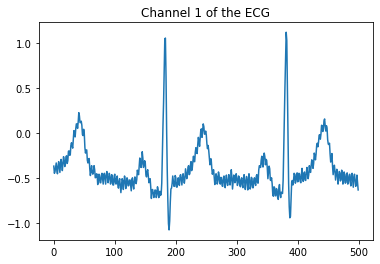

In [11]:
#plt.title("Both Channels (0 and 1)")
#plt.title("Channel 0 of the ECG") #Called ['ECG1']
plt.title('Channel 1 of the ECG') #Called ['ECG2']
plt.plot(sig[:500])

### Accessing annotations 

In [12]:
#display(fields) ### Last record annotation
#print(f"Units in which the ECG is measured {fields['units']}")

In [13]:
#display(properties[22])
#print(f"Units in which the ECG is measured {properties[22]['units']}")

# Calculating the R to R Intervals

In [14]:
single_record_rri = []
rri = []

squared_summed_differencies = 0
i = 0
for i in range(len(Rpeak_Samp)): ### loops 23 times
    single_record_rri = np.diff(Rpeak_Samp[i])
    rri.append(single_record_rri)

In [15]:
#A sample of 250 elements, gives 1 clear signal (because 250hz frequency)
#x = np.arange(0,250)
#plt.plot(x,rri[22][750:1000])

# Segmenting the records and calculating features

In [16]:
#seg_all_rec = []

#amount_to_segment = -(len(rri[0]) % 20)
#record_to_segment = rri[0][:amount_to_segment]
#length = len(record_to_segment) / 20
#segmented_record = np.split(record_to_segment,length)
#seg_all_rec.append(segmented_record)

In [17]:
single_record_mean = []
rri_mean = []
single_record_std = []
rri_std = []
single_record_RMSSD = []
RMSSD = []
single_record_nRMSSD = []
nRMSSD = []

all_segmented_records = []
all_features = []


### TO acess every single record
### record_to_segment = rri[index]
for index in range(len(rri)): ### Loops 23 times
    #(below line) gives a value between 0 and 19, which is the amount used to remove from the end of a record, by slicing.
    amount_to_segment = -(len(rri[index]) % 20)
    if amount_to_segment != 0:
        rri_segmented_record = rri[index][:amount_to_segment]
    else: 
        rri_segmented_record = rri[index] #if divisible by 20, no need to slice this record
    #(below line) gives us the number of "blocks" to put every single 20-segment into.
    length = len(rri_segmented_record) / 20
    rri_segmented_record = np.split(rri_segmented_record,length)
    all_segmented_records.append(rri_segmented_record)
    
    features = []
    
    ### Calculating features for every single segmented "block" inside the segmented_record variable
    for i in range(len(rri_segmented_record)):
        #MEAN
        f1 = np.mean(rri_segmented_record[i])
        #STD
        f2 = np.std(rri_segmented_record[i])
        #RMSSD
        sqaured_summed_differencies = 0
        for k in range(len(rri_segmented_record[i]) - 1): ### loops 19 times
            sqaured_summed_differencies += (rri_segmented_record[i][k] - rri_segmented_record[i][k+1])**2
        squared_summed_differencies_multiplied = 1/(len(rri_segmented_record) - 1) * sqaured_summed_differencies
        f3 = np.sqrt(squared_summed_differencies_multiplied)
        #NORMALIZED RMSSD
        f4 = (f3 / f1)
        
        my_features = pd.Series([np.around(f1,3), np.around(f2,3), np.around(f3,3), np.around(f4,3)], index=['Mean','STD','RMSSD','Normalized RMSSD'])
        features.append(my_features)
        
    all_features.append(features)

### Features for a single block (20 heart beats), inside a given record
### Accessing the 23 individual records (index 0 to 22), gives a single record, that is segmented into arrays of 20. Accessing each 20 array segment/block, by indexing, this time second dimension [ ]-->[ ]<--

In [18]:
n = 3
m = 156

print(f"Record nr {n}, and index {m} in that record contains this segment:") 
print(all_segmented_records[n][m])
print("Features for that specific segment:") 
print(all_features[n][m])

Record nr 3, and index 156 in that record contains this segment:
[165 175 173 170 162 163 165 169 167 169 164 165 162 168 170 169 169 165
 168 169]
Features for that specific segment:
Mean                167.350
STD                   3.380
RMSSD                 0.379
Normalized RMSSD      0.002
dtype: float64


### conversion to numpy arrays

In [19]:
#print(len(all_segmented_records[17]))
#print(len(all_features[18]))

In [20]:
#segmented_arr = np.asarray(all_segmented_records[17])
#feature_arr = np.asarray(all_features[17])
#feature_arr

# Classifications algorithms

### SVM

In [21]:
#from sklearn.model_selection import train_test_split
#X = all_features[3]

In [22]:
#from sklearn import svm
#X = [[0, 0], [1, 1]]
#y = [0, 1]
#X = all_features[3]
#y = np.arange(2167)
#clf = svm.SVC()
#clf.fit(X, y)

In [23]:
#Z = np.asarray(all_features[18])
#predicted = clf.predict(Z) 

### Decision trees

In [24]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [25]:
clf.predict([[2., 2.]])

array([1])

In [26]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

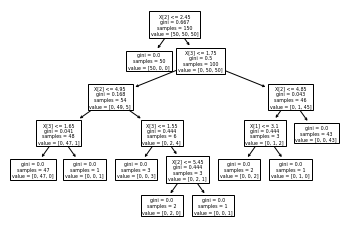

In [27]:
tree.plot_tree(clf) 

# Cross-validation

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True) ### instead of using iris dataset
X.shape, y.shape

((150, 4), (150,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [30]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])